In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [10]:
def read_raw_arrays(f):
    with open(f) as linetxt:
        return np.array([
            np.array(li.split(','), dtype=np.float) 
            # Each line is a character
            for li in linetxt.readlines()
        ])
           
# emotion of a female characters
data_female_emotion = read_raw_arrays('data/metadata/female_emotion.txt')
# cumulative emotion of a female characters
data_female_cum     = read_raw_arrays('data/metadata/female_cum.txt')
# emotion of a male characters
data_male_emotion   = read_raw_arrays('data/metadata/male_emotion.txt')
# cumulative emotion of a male characters
data_male_cum       = read_raw_arrays('data/metadata/male_cum.txt')

print(
    len(data_female_emotion),
    len(data_female_cum    ),
    len(data_male_emotion  ),
    len(data_male_cum      ),
)

7226 7226 7226 7226


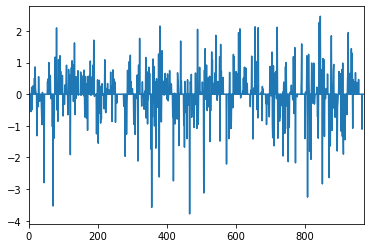

In [20]:
%matplotlib inline
pd.Series(data_female_emotion[0]).plot()

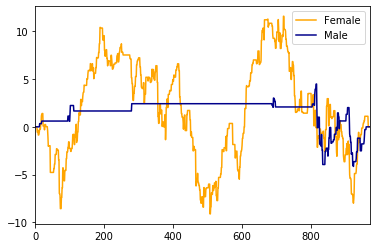

In [31]:
plt.figure()
pd.Series(data_female_cum[0]).plot(c='orange')
pd.Series(data_male_cum[0]).plot(c='darkblue')
plt.legend(['Female', 'Male'])
plt.show()

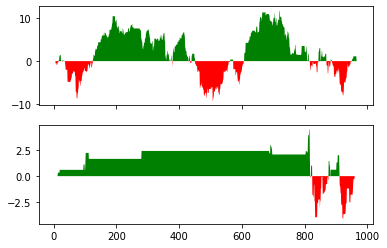

In [41]:
story_idx = 0

x = pd.Series(data_female_cum[store_idx]).index
y_female_acc = data_female_cum[store_idx]
y_male_acc = data_male_cum[store_idx]

fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)

ax1.fill_between(x, 0, y_female_acc, 
                 where=(y_female_acc >= 0), facecolor='green', interpolate=True)
ax1.fill_between(x, 0, y_female_acc, 
                 where=(y_female_acc < 0), facecolor='red', interpolate=True)

ax2.fill_between(x, 0, y_male_acc, 
                 where=(y_male_acc >= 0), facecolor='green', interpolate=True)
ax2.fill_between(x, 0, y_male_acc, 
                 where=(y_male_acc < 0), facecolor='red', interpolate=True)

plt.show()

In [79]:
# Smooth data version
story_idx = 0

smooth_frac = 10
x = pd.Series(data_female_cum[story_idx]).index[::smooth_frac]
y_female_acc = data_female_cum[story_idx][::smooth_frac]
y_male_acc = data_male_cum[story_idx][::smooth_frac]

x_smooth = np.linspace(x.min(), x.max(), smooth_frac*len(x))
f1 = interp1d(x, y_female_acc, kind='quadratic')
f2 = interp1d(x, y_male_acc, kind='quadratic')
y1 = f1(x_smooth)
y2 = f2(x_smooth)

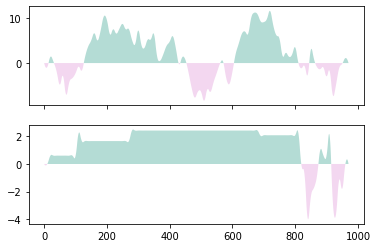

In [84]:
color_up = '#b4dcd5'
color_down = '#f3d7f0'

_, [ax1, ax2] = plt.subplots(2, 1, sharex=True)

ax1.fill_between(x_smooth,  0, y1, 
                 where=(y1 >= 0), facecolor=color_up, interpolate=True)
ax1.fill_between(x_smooth,  0, y1, 
                 where=(y1 < 0), facecolor=color_down, interpolate=True)

ax2.fill_between(x_smooth,  0, y2, 
                 where=(y2 >= 0), facecolor=color_up, interpolate=True)
ax2.fill_between(x_smooth,  0, y2, 
                 where=(y2 < 0), facecolor=color_down, interpolate=True)

plt.show()

In [95]:
def show_acc_stream_plot(story_idx, smooth_frac=10):
    color_up = '#b4dcd5'
    color_down = '#f3d7f0'
    
    x = pd.Series(data_female_cum[story_idx]).index[::smooth_frac]
    y_female_acc = data_female_cum[story_idx][::smooth_frac]
    y_male_acc = data_male_cum[story_idx][::smooth_frac]
    
    x_smooth = np.linspace(x.min(), x.max(), smooth_frac*len(x))
    f1 = interp1d(x, y_female_acc, kind='quadratic')
    f2 = interp1d(x, y_male_acc, kind='quadratic')
    y1 = f1(x_smooth)
    y2 = f2(x_smooth)
    
    # Matplotlib
    _, [ax0, ax1, ax2] = plt.subplots(3, 1, sharex=True)
    
    ax0.plot(x, y_female_acc, c='pink')
    ax0.plot(x, y_male_acc)
    ax0.legend(['Female', 'Male'])
    
    ax1.fill_between(x_smooth,  0, y1, 
                     where=(y1 >= 0), facecolor=color_up, interpolate=True)
    ax1.fill_between(x_smooth,  0, y1, 
                     where=(y1 < 0), facecolor=color_down, interpolate=True)
    
    ax2.fill_between(x_smooth,  0, y2, 
                     where=(y2 >= 0), facecolor=color_up, interpolate=True)
    ax2.fill_between(x_smooth,  0, y2, 
                     where=(y2 < 0), facecolor=color_down, interpolate=True)
    
    plt.show()

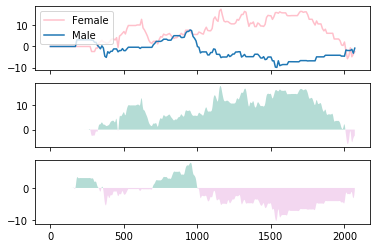

In [97]:
show_acc_stream_plot(story_idx=25)